# Предварительный анализ данных
Первым этапом проводится предварительная обработка данных, как в первой лабораторной работе.

In [ ]:
import pandas as pd

In [ ]:
url = "/content/drive/MyDrive/3heart.csv"
df = pd.read_csv(url,encoding = "utf-8",sep=",")
df.head(20)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160.0,180,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130.0,283,0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,138.0,214,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150.0,195,0,Normal,122.0,N,0.0,Up,0
5,39,M,NAP,120.0,339,0,Normal,170.0,N,0.0,Up,0
6,45,F,ATA,130.0,237,0,Normal,170.0,N,0.0,Up,0
7,54,M,ATA,110.0,208,0,Normal,142.0,N,0.0,Up,0
8,37,M,ASY,140.0,207,0,Normal,130.0,Y,1.5,Flat,1
9,48,F,ATA,120.0,284,0,Normal,120.0,N,0.0,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             925 non-null    int64  
 1   Sex             925 non-null    object 
 2   ChestPainType   925 non-null    object 
 3   RestingBP       923 non-null    float64
 4   Cholesterol     924 non-null    object 
 5   FastingBS       925 non-null    int64  
 6   RestingECG      924 non-null    object 
 7   MaxHR           924 non-null    float64
 8   ExerciseAngina  925 non-null    object 
 9   Oldpeak         925 non-null    float64
 10  ST_Slope        925 non-null    object 
 11  HeartDisease    925 non-null    int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 86.8+ KB


In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

После вывода информации для проведения предварительной обработки переименовываются название столбцов "ChestPainType", "ExerciseAngina", "HeartDesease" на "Chest_Pain_Type", "Exercise_Angina", "Heart_Desease".

In [ ]:
df = df.rename(columns = {"ChestPainType": "Chest_Pain_Type","ExerciseAngina": "Exercise_Angina", "HeartDesease": "Heart_Desease"})
df.columns

Index(['Age', 'Sex', 'Chest_Pain_Type', 'RestingBP', 'Cholesterol',
       'FastingBS', 'RestingECG', 'MaxHR', 'Exercise_Angina', 'Oldpeak',
       'ST_Slope', 'HeartDisease'],
      dtype='object')

Затем находятся и удаляются строки с пустыми значениями и удаляются дубликаты.

In [ ]:
print(df.isna().sum())

Age                0
Sex                0
Chest_Pain_Type    0
RestingBP          2
Cholesterol        1
FastingBS          0
RestingECG         1
MaxHR              1
Exercise_Angina    0
Oldpeak            0
ST_Slope           0
HeartDisease       0
dtype: int64


In [ ]:
df = df.dropna(subset = ["RestingBP", "Cholesterol", "RestingECG", "MaxHR"])

In [ ]:
df = df.drop_duplicates().reset_index()

Следом находятся неявные дубликаты в колонке с полом “M” и “Ma” и в колонке ST_Slope "Up" и "UP", которые устраняются при помощи переименования значений.

In [ ]:
print(df["Sex"].unique())
print(df["Chest_Pain_Type"].unique())
print(df["RestingECG"].unique())
print(df["Exercise_Angina"].unique())
print(df["ST_Slope"].unique())

['M' 'F' 'Ma']
['ATA' 'NAP' 'ASY' 'TA']
['Normal' 'ST' 'LVH']
['N' 'Y']
['Up' 'Flat' 'Down' 'UP']


In [ ]:
df["Sex"] = df["Sex"].replace("Ma", "M")
df["ST_Slope"] = df["ST_Slope"].replace("UP", "Up")

В конце обработки для столбцов "RestingBP", "MaxHR", "Cholesterol" изменяется тип данных на int. Для столбца "Cholesterol" предварительно выполним метод to_numeric модуля pd с переданным значением "coerce" параметра "errors", чтобы заменить некоректные значения на NaN и удалим их при помощи метода dropna.

In [ ]:
df["Cholesterol"] = pd.to_numeric(df["Cholesterol"], errors="coerce")
df = df.dropna(subset = ["Cholesterol"])
df[["RestingBP", "MaxHR", "Cholesterol"]] = df[["RestingBP", "MaxHR", "Cholesterol"]].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 0 to 917
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            917 non-null    int64  
 1   Age              917 non-null    int64  
 2   Sex              917 non-null    object 
 3   Chest_Pain_Type  917 non-null    object 
 4   RestingBP        917 non-null    int64  
 5   Cholesterol      917 non-null    int64  
 6   FastingBS        917 non-null    int64  
 7   RestingECG       917 non-null    object 
 8   MaxHR            917 non-null    int64  
 9   Exercise_Angina  917 non-null    object 
 10  Oldpeak          917 non-null    float64
 11  ST_Slope         917 non-null    object 
 12  HeartDisease     917 non-null    int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 100.3+ KB


# Анализ связей между признаками двумерного набора

Вторым этапом выполнения работы строится матрица диаграмм рассеяния.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b177831f0>,
      dtype=object)

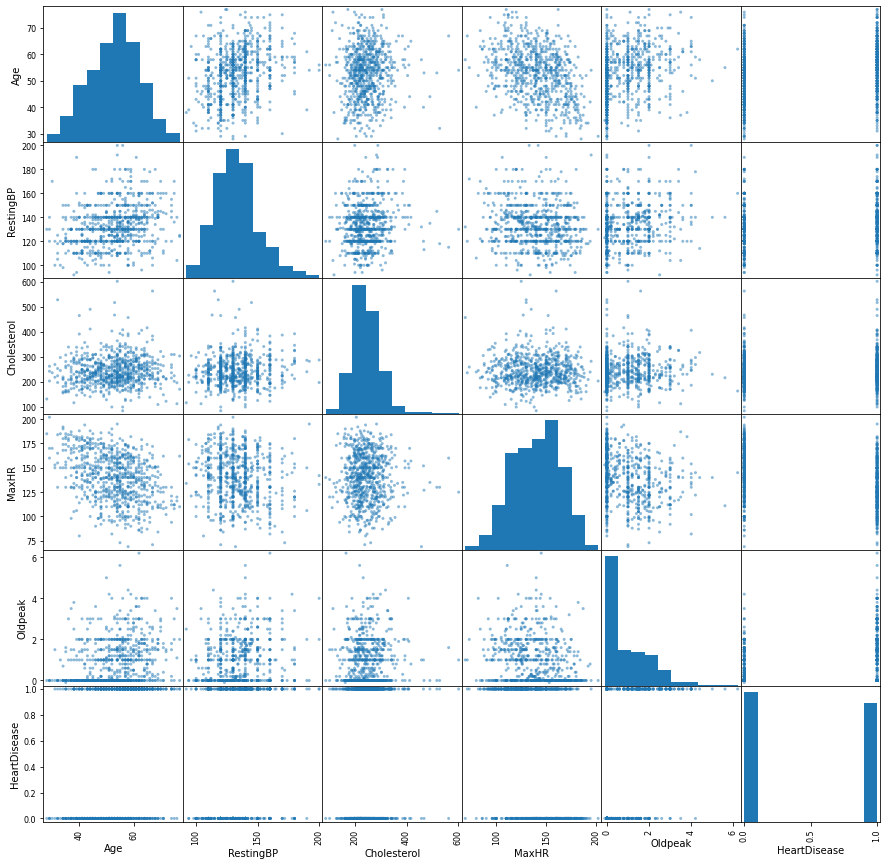

In [ ]:
pd.plotting.scatter_matrix(df[["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak", "HeartDisease"]].query("RestingBP > 70 and Cholesterol > 0"), figsize=(15, 15))

Из построенных диаграмм рассеяности видно, что между параметрами данных нет, четких закономерностей. Все данные распределены достаточно хаотично и из любого возможного правила зависимости будет множество исключений. Между возрастом и уровнем холестерина в крови можно устоновить отсутствие взаимосвязи, так как с увеличением возраста показатель холестирина остается неизменным. Так же можно проследить слабую обратную зависимость максимального пульса и возраста. Из диаграмм рассеянности для целевого показателя Наличие болезни не получается установить зависимость от какого-либо параметра, так как с ростом любого показателя целевой параметр может принимать любое из двух значений.

Затем найдем коэффициент корреляции между параметрами.

In [ ]:
df = df.query("RestingBP > 70 and Cholesterol > 0")
df[["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak", "HeartDisease"]].corr()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.259004,0.056769,-0.381223,0.283602,0.295864
RestingBP,0.259004,1.000000,0.095245,-0.125053,0.197893,0.172446
Cholesterol,0.056769,0.095245,1.000000,-0.019425,0.057592,0.102896
MaxHR,-0.381223,-0.125053,-0.019425,1.000000,-0.259695,-0.377498
Oldpeak,0.283602,0.197893,0.057592,-0.259695,1.000000,0.495156
HeartDisease,0.295864,0.172446,0.102896,-0.377498,0.495156,1.000000


По выведенной таблице коэффициентов корреляции видно, что зависимости между параметрами слабые, или отсутствуют, или имеют не линейный характер. Коэффициент корреляции уровня холестерина в крови с другими параметрами почти равен 0, что может указывать на то, что этот параметр не влияет на остальные.  

После найдем коэффициент ковариации между параметрами.

In [ ]:
df[["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak", "HeartDisease"]].cov()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
Age,90.140914,42.511420,31.890490,-88.813085,2.889348,1.404068
RestingBP,42.511420,298.866656,97.424650,-53.048125,3.671123,1.490140
Cholesterol,31.890490,97.424650,3500.849257,-28.202473,3.656621,3.043123
MaxHR,-88.813085,-53.048125,-28.202473,602.105730,-6.838006,-4.630050
Oldpeak,2.889348,3.671123,3.656621,-6.838006,1.151484,0.265587
HeartDisease,1.404068,1.490140,3.043123,-4.630050,0.265587,0.249845


Из таблицы коэффициентов ковариации видно, что все параметры имеют прямую зависимость, так как их значения больше нуля, кроме параметра Максимального пульса, который имеет обратную зависимость от остальных параметров, так как его коэффициент меньше нуля.

Для удобного анализа коэффициентов корреляции, строится тепловая карта, для этого импортируется модуль seaborn и используется метод heatmap.

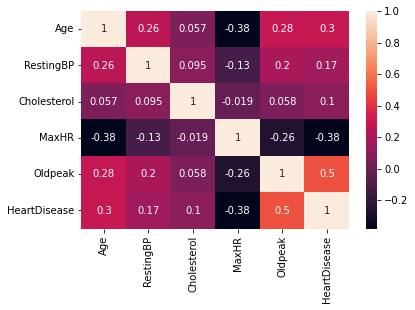

In [ ]:
import seaborn as sns
sns.heatmap(df[["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak", "HeartDisease"]].corr(),annot = True)

Из построенной тепловой карты корреляции видно, что не один из параметров не имеет с другими линейной зависимости.

В результате выполнения работы был произведён анализ связей между параметрами с помощью диаграмм рассеяния и коэффициентов корреляции и ковариации. В результате анализа не были выявлены линейные зависимости между параметрами. Причиной этого может являться малое количество данных или наличие не линейных зависимостей, поэтому полученные результаты нельзя считать точными и достоверными.

# Доплнительное задание


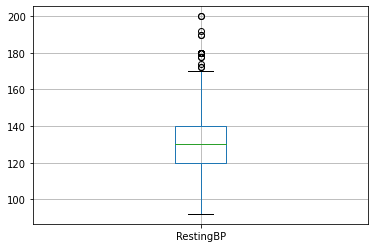

In [ ]:
df.boxplot(column="RestingBP")

По построенной диаграмме видно, что медианное значение по столбцу с пульсом в спокойном состоянии около 130, а стандартные значения расположены в промежутке от 120 до 140, максимальное значение без выбросов около 170, минимально около 90, все выбросы больше, чем максимальное значение.

In [ ]:
df[["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]].describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,745.000000,745.000000,745.000000,745.000000,745.000000
mean,52.916779,133.040268,244.702013,140.226846,0.902819
std,9.494257,17.287760,59.167975,24.537843,1.073072
min,28.000000,92.000000,85.000000,69.000000,-0.100000
25%,46.000000,120.000000,208.000000,122.000000,0.000000
50%,54.000000,130.000000,237.000000,140.000000,0.500000
75%,59.000000,140.000000,275.000000,160.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


Из выведенной информации с помощью метода describe можно увидеть, что средний возраст в выборке 53 года при стандартном отклонении в 10, минимально значение 28 и максимальное 77, это говорит о том, что выборка проводилась среди людей в возрасте.

В столбце с пульсом в состоянии покоя среднее значение 133 и стандартное отклонение 17, максимальное значение 200, минимальное 92, что говорит, о отсутствии в состоянии покоя у большинства повышенного количества сердечных сокращений.

В столбце с максимальным пульсом во время нагрузки среднее значение 140 и стандартное отклонение 25, максимальное 202, а минимальное 69, что показывает, что при нагрузке у большинства повышенный пульс.

В столбце с уровне холестерина в крови среднее значение 245 при стандартном отклонении 59, максимальное значение 603, минимальное 85, а значения среднего для выборки из 25% и 75% показывает 208 и 275, что показывает присутствие в выборке выбросов больше и меньше стандартных значений.

Из информации о столбце депресия ST следует, что значения его в основном расположены в промежутке от 1 до 0.

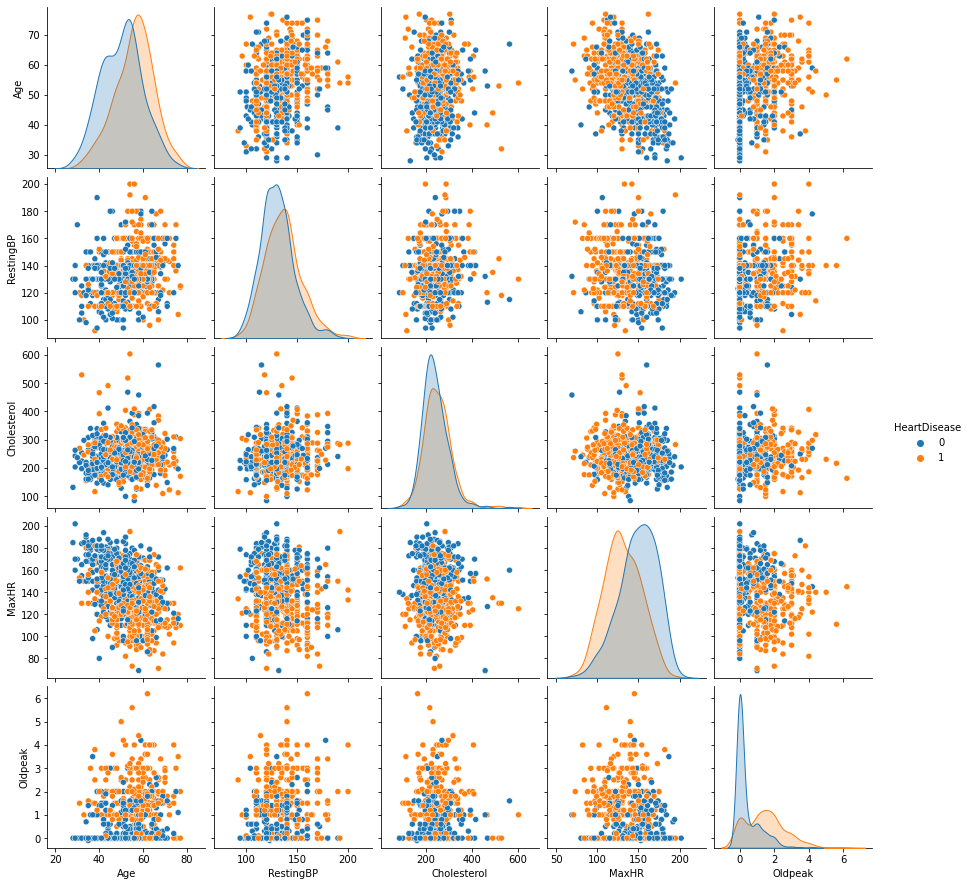

In [ ]:
sns.pairplot(df[["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak", "HeartDisease"]], hue="HeartDisease")

На построенных графиках можно увидеть следующие взаимосвязи:

1. С возрастом повышается количество людей с болезнью сердца

2. У здоровых людей больше пульс в состоянии покоя, чем у больных

3. Максильный пульс при нагрузке также больше у здоровых людей, и не зависит от уровня холестерина в крови

4. У здоровых людей деперсия ST в сосновном 0, а у больных от 0 до 2.